In this notebook, different optimization algorithms are used for training the neural network on moons dataset from sci-kit learn datasets

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from deep_neural_network import DeepNN
from sklearn.datasets import make_moons

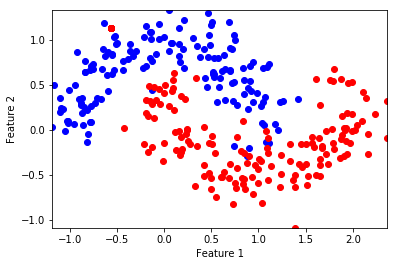

In [2]:
#Load the dataset and plot
x_train,y_train = make_moons(n_samples=300, noise=.2)
y_train = y_train.reshape(300,1).astype(float)
plt.scatter(x = x_train[np.argwhere(y_train==0),0],y = x_train[np.argwhere(y_train==0),1],color = 'blue')
plt.scatter(x = x_train[np.argwhere(y_train==1),0],y = x_train[np.argwhere(y_train==1),1],color = 'red')
plt.xlim(min(x_train[:,0]),max(x_train[:,0]))
plt.ylim(min(x_train[:,1]),max(x_train[:,1]))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
#Normalize rhe features
means,std = np.mean(x_train,axis = 0).reshape(1,x_train.shape[1]),np.std(x_train,axis = 0).reshape(1,x_train.shape[1])
x_train = (x_train - means)/std

First, we will run mini batch gradient descent algorithm on this

In [6]:
#Initialize the neural network
algo_dict = {'Algorithm':'mini_batch_GD','Parameters':[0]}
dnn_mini_batch = DeepNN(num_layers=4,units=[x_train.shape[1],5,2,1],activation_fns = ['relu','relu','sigmoid'],initialisation = 'random')
result_dict = dnn_mini_batch.train_NN(x_train,y_train,10000,0.006,algo_dict,mini_batch_size = 64)
print("-----------------------------------------------------------------------------------")
print("Training accuracy: " + str(dnn_mini_batch.accuracy(y_train,dnn_mini_batch.predict(x_train))))

Epoch 100
Training Cost: 0.6931484584107381
---------------------
Epoch 100
Training Cost: 0.6931623644721185
---------------------
Epoch 100
Training Cost: 0.6931364460163304
---------------------
Epoch 100
Training Cost: 0.6931058624786436
---------------------
Epoch 100
Training Cost: 0.6933208081836049
---------------------
Epoch 200
Training Cost: 0.6931492246763713
---------------------
Epoch 200
Training Cost: 0.6931223544363645
---------------------
Epoch 200
Training Cost: 0.6931941944783193
---------------------
Epoch 200
Training Cost: 0.6931567495975736
---------------------
Epoch 200
Training Cost: 0.6930895530435911
---------------------
Epoch 300
Training Cost: 0.6932286254252973
---------------------
Epoch 300
Training Cost: 0.6930951413480286
---------------------
Epoch 300
Training Cost: 0.6931508519709288
---------------------
Epoch 300
Training Cost: 0.6931889551883411
---------------------
Epoch 300
Training Cost: 0.6929005408876175
---------------------
Epoch 400


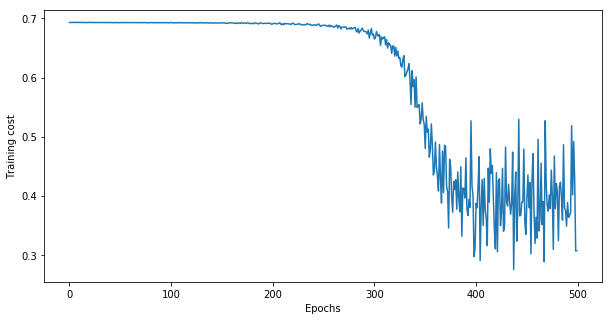

In [7]:
#lotting the results of Mini Batch GD
plt.figure(figsize = (10,5))
plt.plot(result_dict['Training cost'])
plt.xlabel('Epochs')
plt.ylabel('Training cost')
plt.show()

Lets run Mini batch gradient descent with momentum.

In [11]:
#Initializing the neural network
algo_dict = {'Algorithm':'GDMomentum','Parameters':[0.9]}
dnn_momentum_GD = DeepNN(num_layers=4,units=[x_train.shape[1],5,2,1],activation_fns = ['relu','relu','sigmoid'],initialisation = 'random')
result_dict = dnn_momentum_GD.train_NN(x_train,y_train,10000,0.006,algo_dict,mini_batch_size = 64)
print("Training Accuracy: " + str(dnn_momentum_GD.accuracy(y_train,dnn_momentum_GD.predict(x_train))))


Epoch 100
Training Cost: 0.6931156506843678
---------------------
Epoch 100
Training Cost: 0.6931533998036012
---------------------
Epoch 100
Training Cost: 0.6930928947150378
---------------------
Epoch 100
Training Cost: 0.6931633521762167
---------------------
Epoch 100
Training Cost: 0.6930905771278909
---------------------
Epoch 200
Training Cost: 0.6931481222578844
---------------------
Epoch 200
Training Cost: 0.693105484179444
---------------------
Epoch 200
Training Cost: 0.6931240850184326
---------------------
Epoch 200
Training Cost: 0.6931238112892314
---------------------
Epoch 200
Training Cost: 0.6931035704319795
---------------------
Epoch 300
Training Cost: 0.6931452956214362
---------------------
Epoch 300
Training Cost: 0.6931383584776831
---------------------
Epoch 300
Training Cost: 0.6931092759909314
---------------------
Epoch 300
Training Cost: 0.6931164120553881
---------------------
Epoch 300
Training Cost: 0.6931031020477674
---------------------
Epoch 400
T

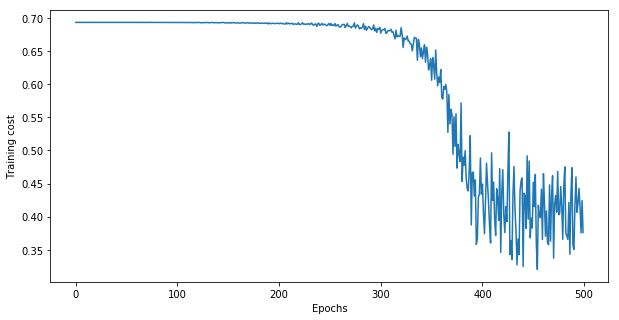

In [12]:
#plotting the results of Mini Batch GD
plt.figure(figsize = (10,5))
plt.plot(result_dict['Training cost'])
plt.xlabel('Epochs')
plt.ylabel('Training cost')
plt.show()

Training accuracy gets to 84%. Now lets do the same with Adam optimization algorithm

In [4]:
#Initializing the neural network
algo_dict = {'Algorithm':'Adam','Parameters':[0.9,0.999]}
dnn_adam = DeepNN(num_layers=4,units=[x_train.shape[1],5,2,1],activation_fns = ['relu','relu','sigmoid'],initialisation = 'random')
result_dict = dnn_adam.train_NN(x_train,y_train,10000,0.0007,algo_dict,mini_batch_size = 64)
print("Training Accuracy: " + str(dnn_adam.accuracy(y_train,dnn_adam.predict(x_train))))


Epoch 100
Training Cost: 0.6273385603739138
------------------------------------------
Epoch 100
Training Cost: 0.5786204846256471
------------------------------------------
Epoch 100
Training Cost: 0.6124386918543148
------------------------------------------
Epoch 100
Training Cost: 0.6251776973525034
------------------------------------------
Epoch 100
Training Cost: 0.6011182554123388
------------------------------------------
Epoch 200
Training Cost: 0.5713064293432534
------------------------------------------
Epoch 200
Training Cost: 0.5575967358914254
------------------------------------------
Epoch 200
Training Cost: 0.5184583227567744
------------------------------------------
Epoch 200
Training Cost: 0.4842969225182449
------------------------------------------
Epoch 200
Training Cost: 0.5770267302074038
------------------------------------------
Epoch 300
Training Cost: 0.4395646670495651
------------------------------------------
Epoch 300
Training Cost: 0.5623593474588894

Training accuracy increased a bit